In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
data_pd = pd.read_csv('Nonull_Clean.csv')
#print(data_pd)
#data_pd.shape

In [ ]:
# Extract the features (x) and target variable (y) from the dataset
x = data_pd.drop('Target1', axis=1)
y = data_pd['Target1']

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
x_scaled = scaler.fit_transform(x)


In [ ]:
X = np.array(x_scaled)
y = np.array(y)

y_train, y_Val = train_test_split(y, train_size=0.8,random_state=40)

In [ ]:
for i in range(2,85):
  pca = PCA(n_components = i)
  data_reduced = pca.fit_transform(x_scaled)
  model = LogisticRegression(max_iter=5000)
  X_train, X_Val = train_test_split(data_reduced, train_size=0.8,random_state=42)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_Val)
  print('Accuracy for',i,':', accuracy_score(y_Val, y_pred))
  print('F1 Score for' ,i, ':' ,f1_score(y_Val, y_pred))
  print('Confusion Matrix for',i,':', confusion_matrix(y_Val, y_pred))


Accuracy for 2 : 0.5006666666666667
F1 Score for 2 : 0.5077226421294775
Confusion Matrix for 2 : [[14590 15399]
 [14561 15450]]
Accuracy for 3 : 0.49805
F1 Score for 3 : 0.5133864374464785
Confusion Matrix for 3 : [[13996 15993]
 [14124 15887]]
Accuracy for 4 : 0.49851666666666666
F1 Score for 4 : 0.5135873518808904
Confusion Matrix for 4 : [[14026 15963]
 [14126 15885]]
Accuracy for 5 : 0.49853333333333333
F1 Score for 5 : 0.5136271054928712
Confusion Matrix for 5 : [[14025 15964]
 [14124 15887]]
Accuracy for 6 : 0.49773333333333336
F1 Score for 6 : 0.5081763880275484
Confusion Matrix for 6 : [[14295 15694]
 [14442 15569]]
Accuracy for 7 : 0.49928333333333336
F1 Score for 7 : 0.4838593296338928
Confusion Matrix for 7 : [[15875 14114]
 [15929 14082]]
Accuracy for 8 : 0.49978333333333336
F1 Score for 8 : 0.4889577551124657
Confusion Matrix for 8 : [[15629 14360]
 [15653 14358]]
Accuracy for 9 : 0.49816666666666665
F1 Score for 9 : 0.4908002435229656
Confusion Matrix for 9 : [[15379 1461

In [ ]:
data_pd_cp = data_pd.copy()

# Standardize the data using z-scores
data_z = data_pd_cp.apply(zscore)

# Calculate the absolute z-score for each data point
data_z_abs = data_z.abs()

# Identify the outliers based on a z-score threshold
outliers = (data_z_abs > 3).any(axis=1)

# Print the indices of the outliers
outlier_indices = (outliers.index[outliers])

data_pd_cp = data_pd_cp.drop(outlier_indices)

# Extract the features (x) and target variable (y) from the dataset
x = data_pd_cp.drop('Target1', axis=1)
y = data_pd_cp['Target1']

# Initialize the StandardScaler object
#scaler = StandardScaler()

# Fit the scaler to the features and transform the data
#x_scaled = scaler.fit_transform(x)
acc_best = 0
f1_best = 0

for i in range(2,85):
  pca = PCA(n_components = i)
  data_reduced = pca.fit_transform(x)
  model = LogisticRegression(max_iter=50000)
  X_train, X_Val, y_train, y_Val = train_test_split(data_reduced,y, train_size=0.8,random_state=42)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_Val)
  acc = accuracy_score(y_Val, y_pred)
  f1 = f1_score(y_Val, y_pred)
  if acc > acc_best :
    acc_best = acc
    print('Accuracy Best',i)
  if f1 > f1_best:
    f1_best = f1
    print('F1 Best',i)

Accuracy Best 2
F1 Best 2
F1 Best 3
Accuracy Best 4
F1 Best 4
Accuracy Best 5
F1 Best 5
Accuracy Best 6
F1 Best 6
Accuracy Best 7
F1 Best 7
Accuracy Best 8
Accuracy Best 9
Accuracy Best 10
Accuracy Best 12
Accuracy Best 13
Accuracy Best 14
Accuracy Best 17
Accuracy Best 18
Accuracy Best 20
Accuracy Best 24
Accuracy Best 28
Accuracy Best 31
Accuracy Best 32


KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_pd_cp = data_pd.copy()

# Standardize the data using z-scores
data_z = data_pd_cp.apply(zscore)

# Calculate the absolute z-score for each data point
data_z_abs = data_z.abs()

# Identify the outliers based on a z-score threshold
outliers = (data_z_abs > 3).any(axis=1)

# Print the indices of the outliers
outlier_indices = (outliers.index[outliers])

data_pd_cp = data_pd_cp.drop(outlier_indices)

# Extract the features (x) and target variable (y) from the dataset
x = data_pd_cp.drop('Target1', axis=1)
y = data_pd_cp['Target1']

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 65)
data_reduced = pca.fit_transform(x_scaled)
model = LogisticRegression(max_iter=5000)
model.fit(data_reduced,y)

# X is your feature matrix and y is your target vector
# model is your logistic regression model
scores = cross_val_score(model, data_reduced, y, cv=5)

# Print the accuracy for each fold of cross-validation
print("Accuracy for each fold:", scores)

# Print the mean accuracy across all folds
print("Mean accuracy:", scores.mean())


Accuracy for each fold: [0.69337792 0.70840558 0.71410288 0.70906614 0.69238709]
Mean accuracy: 0.7034679217240525


In [ ]:
scores = cross_val_score(model, data_reduced, y, cv=10)

# Print the accuracy for each fold of cross-validation
print("Accuracy for each fold:", scores)

# Print the mean accuracy across all folds
print("Mean accuracy:", scores.mean())

Accuracy for each fold: [0.69185038 0.69961192 0.70415325 0.71373132 0.71629098 0.71166708
 0.70729089 0.7094377  0.70167616 0.68235488]
Mean accuracy: 0.7038064569399719


AUC for Model 1: 0.6911657486558257
AUC for Model 2: 0.579598115202955


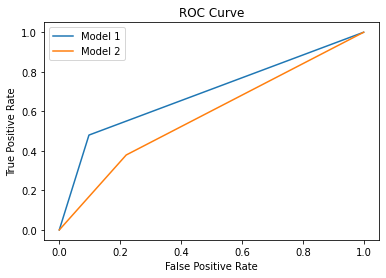

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

data_pd_cp = data_pd.copy()

# Standardize the data using z-scores
data_z = data_pd_cp.apply(zscore)

# Calculate the absolute z-score for each data point
data_z_abs = data_z.abs()

# Identify the outliers based on a z-score threshold
outliers = (data_z_abs > 3).any(axis=1)

# Print the indices of the outliers
outlier_indices = (outliers.index[outliers])

data_pd_cp = data_pd_cp.drop(outlier_indices)

# Extract the features (x) and target variable (y) from the dataset
x = data_pd_cp.drop('Target1', axis=1)
y = data_pd_cp['Target1']

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
x_scaled = scaler.fit_transform(x)
# Assuming y_test and y_pred are the true labels and predicted labels for the test set, respectively, for two models
pca = PCA(n_components = 65)
data_reduced = pca.fit_transform(x_scaled)
model = LogisticRegression(max_iter=5000)
X_train, X_test, y_train, y_test = train_test_split(data_reduced,y, train_size=0.8,random_state=42)
model.fit(X_train,y_train)
y_pred_model1 = model.predict(X_test)

pca = PCA(n_components = 2)
data_reduced2 = pca.fit_transform(x_scaled)
model = LogisticRegression(max_iter=5000)
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_reduced2,y, train_size=0.8,random_state=42)
model.fit(X_train1,y_train1)
y_pred_model2 = model.predict(X_test1)


# Calculate the fpr, tpr, and threshold values for the two models
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_model1)
fpr2, tpr2, threshold2 = roc_curve(y_test1, y_pred_model2)

# Plot the ROC curves for the two models
plt.plot(fpr1, tpr1, label='Model 1')
plt.plot(fpr2, tpr2, label='Model 2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Calculate the AUC values for the two models
auc1 = roc_auc_score(y_test, y_pred_model1)
auc2 = roc_auc_score(y_test1, y_pred_model2)

# Compare the AUC values for the two models
print('AUC for Model 1:', auc1)
print('AUC for Model 2:', auc2)
